# Mangaki fancy stats: Users, Ratings & Works

Here are fancy plots.

In [1]:
import datetime

# IMPORTANT DATES
ratings_have_date = datetime.date(2016, 4, 9)  # Before April 9, 2016, Rating objects didn't have a date attribute
year_2017 = datetime.date(2017, 1, 1)

We can directly use Django's ORM in order to compute the number of objects created per day.

In [2]:
from django.contrib.auth.models import User
from collections import Counter

nb_users_per_day = Counter(map(lambda dt: dt.date(), User.objects.values_list('date_joined', flat=True)))
nb_ratings_per_day = Counter(map(lambda dt: dt.date(), Rating.objects.values_list('date', flat=True)))

We say a work is **new** when it has been added to someone's ratings for the first time.

In [3]:
nb_new_works_over_time = Counter()
already_rated = set()
for work_id, dt in Rating.objects.values_list('work_id', 'date'):
    if work_id not in already_rated:
        day = dt.date()
        already_rated.add(work_id)
        nb_new_works_over_time[day] += 1

In [4]:
x = sorted(set(nb_users_per_day.keys()) | set(nb_ratings_per_day.keys()))

In [5]:
# Useful indexes for plotting
i_rw = x.index(ratings_have_date)
i_2017 = x.index(year_2017)

In [6]:
import numpy as np

y_u = list(nb_users_per_day[day] for day in x)
y_uc = np.cumsum(y_u)

In [7]:
y_r = list(nb_ratings_per_day[day] for day in x)
y_rc = np.cumsum(y_r)

In [8]:
y_w = list(nb_new_works_over_time[day] for day in x)
y_wc = np.cumsum(y_w)

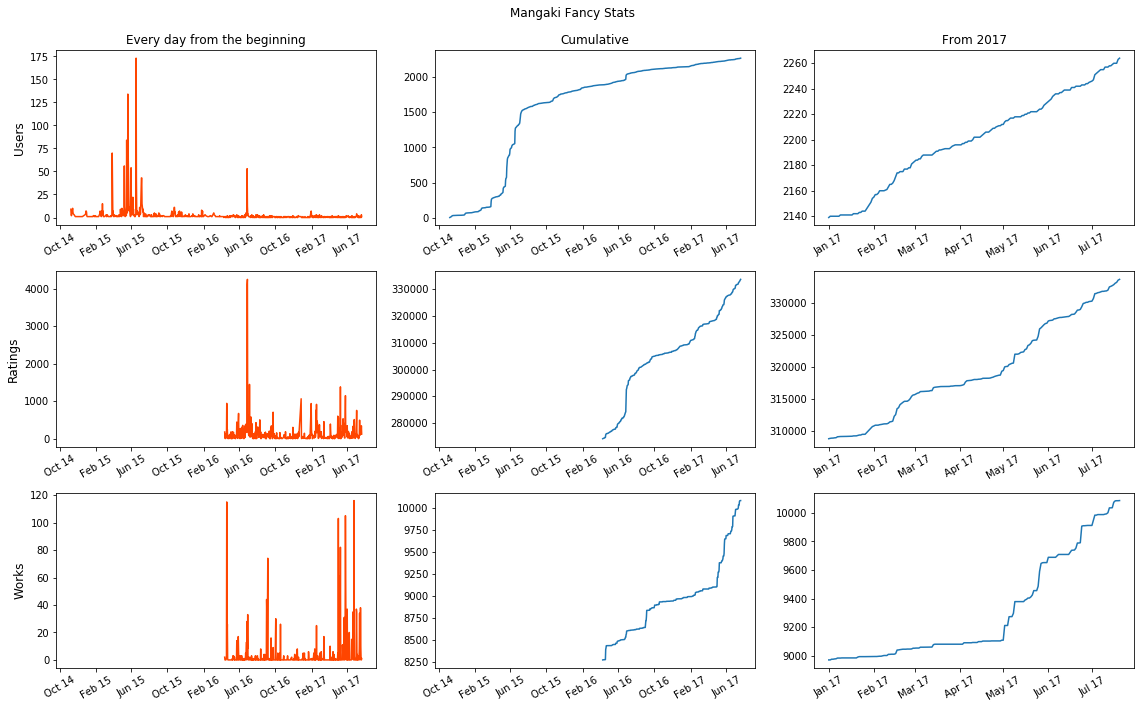

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

cols = ['Every day from the beginning', 'Cumulative', 'From 2017']
rows = ['Users', 'Ratings', 'Works']

fig, axes = plt.subplots(3, 3, figsize=(16, 10), sharex='col')  # x-axis will be shared across columns
(users, users_cumul, users2017), (ratings, ratings_cumul, ratings2017), (works, works_cumul, works2017) = axes

users.xaxis.set_major_formatter(DateFormatter('%b %y'))
users_cumul.xaxis.set_major_formatter(DateFormatter('%b %y'))
users2017.xaxis.set_major_formatter(DateFormatter('%b %y'))

users.plot_date(x, y_u, 'orangered')
users_cumul.plot_date(x, y_uc, '-')
users2017.plot_date(x[i_2017:], y_uc[i_2017:], '-')

ratings.plot_date(x[i_rw+1:], y_r[i_rw+1:], 'orangered')
ratings_cumul.plot_date(x[i_rw:], y_rc[i_rw:], '-')
ratings2017.plot_date(x[i_2017:], y_rc[i_2017:], '-')

works.plot_date(x[i_rw+1:], y_w[i_rw+1:], 'orangered')
works_cumul.plot_date(x[i_rw:], y_wc[i_rw:], '-')
works2017.plot_date(x[i_2017:], y_wc[i_2017:], '-')

# fig.autofmt_xdate() only displays labels at the bottom so we need something else
for ax in axes.flatten():
    for tk in ax.get_xticklabels():
        tk.set_visible(True)
        tk.set_rotation(30)

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

plt.suptitle('Mangaki Fancy Stats')
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

Since end of April 17, we seem to have many more works in the database. How come?

Answer: [this PR](https://github.com/mangaki/mangaki/pull/301) from @RaitoBezarius that fixes myAnimeList imports.